In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

visa_df = pd.read_csv(r"C:\Users\vinay\Documents\Naresh IT\Data_Files\Visadataset.csv")
cat = visa_df.select_dtypes(include='object').columns
num = visa_df.select_dtypes(exclude='object').columns
visa_df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


- we have two types of scaling
    - Z score Scaling (Standardization)
    - min-max Scaling (Normalization)

## Z score Scaling (Standardization) ##

- z = (x - μ) / σ, 
- where z = z-score
- x = data
- μ = mean
- σ = standard

- Step 1 : Take the prevaling wage Data
- Step 2 : Calculate Mean of wage
- Step 3 : Calculate SD of Mean
- Step 4 : Nr = step 1 - step 2
- Step 5 : z = step 4 / step 3

In [2]:
wage_data = visa_df['prevailing_wage']
wage_mean = wage_data.mean()
wage_sd = wage_data.std()
wage_data_z = (wage_data-wage_mean)/wage_sd
visa_df['prevailing_wage_z'] = wage_data_z
visa_df['prevailing_wage_z']

0       -1.398510
1        0.169832
2        0.919060
3        0.169991
4        1.428576
           ...   
25475    0.049923
25476    3.876083
25477    1.360253
25478    0.221504
25479   -0.067762
Name: prevailing_wage_z, Length: 25480, dtype: float64

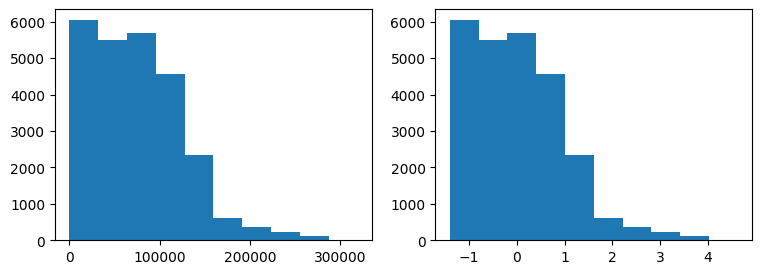

In [3]:
# Histogram is not changed
# Only the Data Values is Scaled Down
# But the meaning of the data will not change

plt.figure(figsize=(9,3))
plt.subplot(1,2,1).hist(wage_data)
plt.subplot(1,2,2).hist(wage_data_z)
plt.show()

- wage_data have a Maximum, Minimum value id
- wage_data_z have a Maximum, Minimum value id

In [4]:
wage_data.idxmax(),wage_data_z.idxmax()

(21077, 21077)

In [5]:
wage_data.idxmin(),wage_data_z.idxmin()

(20575, 20575)

- id = 21077 has maximum value for both data
- id = 20575 has minimum value for both data

In [6]:
visa_df.iloc[[21077,20575]][['prevailing_wage','prevailing_wage_z']]

,prevailing_wage,prevailing_wage_z
21077,319210.2700,4.634102
20575,2.1367,-1.409682


In [7]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
wage_data = pd.DataFrame(wage_data)
wage_data_ss = sc.fit_transform(wage_data)
visa_df['wage_data_ss'] = wage_data_ss

In [8]:
visa_df[['prevailing_wage','prevailing_wage_z','wage_data_ss']]

,prevailing_wage,prevailing_wage_z,wage_data_ss
0,592.2029,-1.398510,-1.398537
1,83425.6500,0.169832,0.169835
2,122996.8600,0.919060,0.919079
3,83434.0300,0.169991,0.169994
4,149907.3900,1.428576,1.428604
...,...,...,...
25475,77092.5700,0.049923,0.049924
25476,279174.7900,3.876083,3.876159
25477,146298.8500,1.360253,1.360280
25478,86154.7700,0.221504,0.221509


In [9]:
visa_df.iloc[[21077,20575]][['prevailing_wage','prevailing_wage_z','wage_data_ss']]

,prevailing_wage,prevailing_wage_z,wage_data_ss
21077,319210.2700,4.634102,4.634193
20575,2.1367,-1.409682,-1.409710


## min-max Scaling (Normalization) ##

- normalized_value = (value - min_value) / (max_value - min_value)
- value is the original data value
- min_value is the minimum value in the dataset
- max_value is the maximum value in the dataset.

In [10]:
wage_data = visa_df['prevailing_wage']
x_min = wage_data.min()
x_max = wage_data.max()
min_max = (wage_data - x_min)/(x_max - x_min)
visa_df['min_max'] = min_max
visa_df['min_max']

0        0.001849
1        0.261345
2        0.385312
3        0.261371
4        0.469616
           ...   
25475    0.241505
25476    0.874579
25477    0.458311
25478    0.269895
25479    0.222033
Name: min_max, Length: 25480, dtype: float64

In [11]:
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()
wage_data = pd.DataFrame(wage_data)
min_max_ss = ms.fit_transform(wage_data)
visa_df['min_max_ss'] = min_max_ss
visa_df['min_max_ss']

0        0.001849
1        0.261345
2        0.385312
3        0.261371
4        0.469616
           ...   
25475    0.241505
25476    0.874579
25477    0.458311
25478    0.269895
25479    0.222033
Name: min_max_ss, Length: 25480, dtype: float64

In [12]:
visa_df[['prevailing_wage','min_max','min_max_ss']]

,prevailing_wage,min_max,min_max_ss
0,592.2029,0.001849,0.001849
1,83425.6500,0.261345,0.261345
2,122996.8600,0.385312,0.385312
3,83434.0300,0.261371,0.261371
4,149907.3900,0.469616,0.469616
...,...,...,...
25475,77092.5700,0.241505,0.241505
25476,279174.7900,0.874579,0.874579
25477,146298.8500,0.458311,0.458311
25478,86154.7700,0.269895,0.269895


In [13]:
visa_df.iloc[[21077,20575]][['prevailing_wage','min_max','min_max_ss']]

,prevailing_wage,min_max,min_max_ss
21077,319210.2700,1.0,1.0
20575,2.1367,0.0,0.0


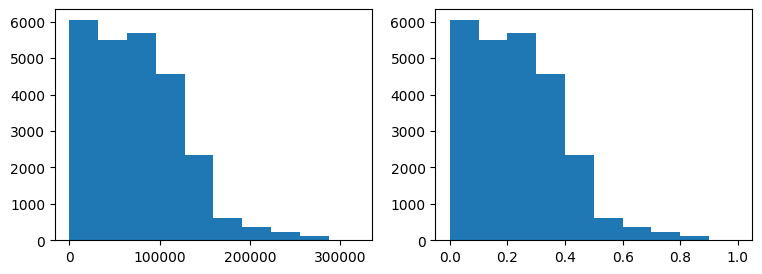

In [14]:
plt.figure(figsize=(9,3))
plt.subplot(1,2,1).hist(wage_data)
plt.subplot(1,2,2).hist(min_max_ss)
plt.show()

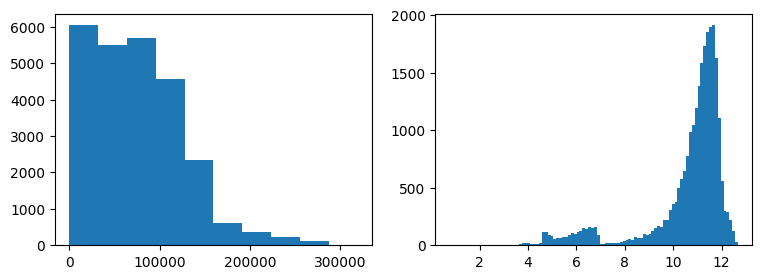

In [15]:
# Log Transform

wage_data = pd.DataFrame(wage_data)
log_transform = np.log(wage_data)
visa_df['log_transform'] = log_transform

plt.figure(figsize=(9,3))
plt.subplot(1,2,1).hist(wage_data)
plt.subplot(1,2,2).hist(log_transform,bins=100)
plt.show()

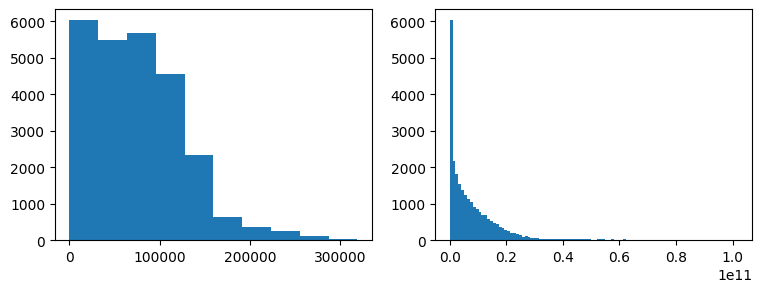

In [16]:
# Square Transformation

wage_data = pd.DataFrame(wage_data)
square_transform = np.square(wage_data)
visa_df['square_transform'] = square_transform

plt.figure(figsize=(9,3))
plt.subplot(1,2,1).hist(wage_data)
plt.subplot(1,2,2).hist(square_transform,bins=100)
plt.show()

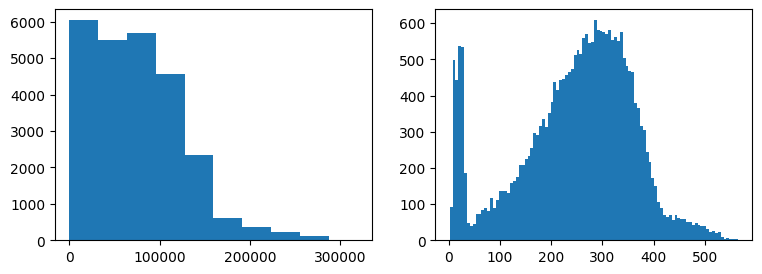

In [17]:
# Square Root Transformation

wage_data = pd.DataFrame(wage_data)
square_root_transform = np.sqrt(wage_data)
visa_df['square_root_transform'] = square_root_transform

plt.figure(figsize=(9,3))
plt.subplot(1,2,1).hist(wage_data)
plt.subplot(1,2,2).hist(square_root_transform,bins=100)
plt.show()

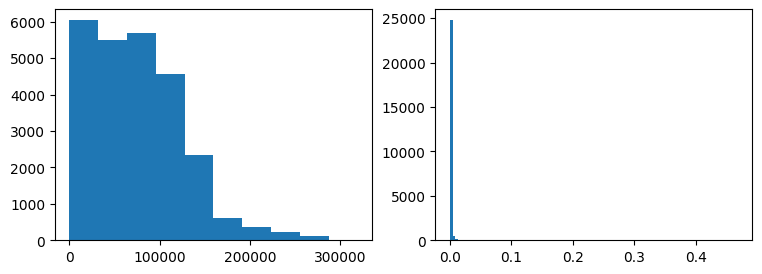

In [18]:
# Receprocal Transformation
wage_data = pd.DataFrame(wage_data)
receprocal_transform = 1/(wage_data)
visa_df['receprocal_transform'] = receprocal_transform

plt.figure(figsize=(9,3))
plt.subplot(1,2,1).hist(wage_data)
plt.subplot(1,2,2).hist(receprocal_transform,bins=100)
plt.show()

In [25]:
# # Exponential Transformation

# wage_data = pd.DataFrame(wage_data)
# exponential_transform = round(e**wage_data,2)
# visa_df['exponential_transform'] = exponential_transform

# plt.figure(figsize=(9,3))
# plt.subplot(1,2,1).hist(wage_data)
# plt.subplot(1,2,2).hist(exponential_transform,bins=100)
# plt.show()